In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'hygdata_v3.csv')

In [2]:
df.head()

,id,hip,hd,hr,gl,bf,proper,ra,dec,dist,...,bayer,flam,con,comp,comp_primary,base,lum,var,var_min,var_max
0,1,1.0,224700.0,NaN,NaN,NaN,NaN,0.000060,1.089009,219.7802,...,NaN,NaN,Psc,1,1,NaN,9.638290,NaN,NaN,NaN
1,2,2.0,224690.0,NaN,NaN,NaN,NaN,0.000283,-19.498840,47.9616,...,NaN,NaN,Cet,1,2,NaN,0.392283,NaN,NaN,NaN
2,3,3.0,224699.0,NaN,NaN,NaN,NaN,0.000335,38.859279,442.4779,...,NaN,NaN,And,1,3,NaN,386.901132,NaN,NaN,NaN
3,4,4.0,224707.0,NaN,NaN,NaN,NaN,0.000569,-51.893546,134.2282,...,NaN,NaN,Phe,1,4,NaN,9.366989,NaN,NaN,NaN
4,5,5.0,224705.0,NaN,NaN,NaN,NaN,0.000665,-40.591202,257.7320,...,NaN,NaN,Phe,1,5,NaN,21.998851,NaN,NaN,NaN


## Data (hygdata_v3.csv) : dataframe and plots

In [169]:
print(df.shape)
df_temp = df[['id','ra','dec','spect','dist','lum', 'var', 'var_min', 'var_max']]
df_temp.shape

(119613, 37)


(119613, 9)

In [56]:
# df_temp['dist_met'] = df_temp['dist']*3.262*365*24*60*60*3*100000000
# df_temp['inci_flux'] = df_temp['lum']/(4*np.pi*df_temp['dist_met']**2)

# RAD = np.pi/180
# df_temp['ra_rad'] = df['ra']*15*RAD # 1 hour=15 degree
# df_temp['dec_rad'] = df['dec']*RAD

In [170]:
df_temp['flux_prop'] = df_temp['lum']/(df_temp['dist']**2)
df_temp['ra'] = df_temp['ra']*15

In [171]:
df_temp.tail()

,id,ra,dec,spect,dist,lum,var,var_min,var_max,flux_prop
119608,119611,23.963895,38.629391,m,16.9492,0.002200,NaN,NaN,NaN,7.657757e-06
119609,119612,23.996567,47.762093,m,16.7224,0.000088,NaN,NaN,NaN,3.160842e-07
119610,119613,23.996218,-44.067905,M7,18.5185,0.002224,NaN,NaN,NaN,6.486171e-06
119611,119614,23.997386,-34.111986,M4,12.8205,0.001086,NaN,NaN,NaN,6.609827e-06
119612,119615,0.036059,-43.165974,DA5,7.8003,0.000319,NaN,NaN,NaN,5.250219e-06


In [173]:
df_spect = df_temp.dropna(subset=['spect'])
df_spect['spect_first'] = df_spect['spect'].apply(lambda x: x[0])

RA = along lines of longitude = x

DEC = along lines of latitude = y

https://github.com/astronexus/HYG-Database/blob/master/README.md

http://astrosat.iucaa.in/czti/?q=grb

http://astronomy.swin.edu.au/cosmos/E/Equatorial+Coordinate+System

http://balbuceosastropy.blogspot.com/2013/09/the-mollweide-projection.html



In [144]:
def plot_mwd(fig, ax, df, columns=['ra', 'dec' ], whole_data=True, spect=None, origin=0, size=500, scale=100, color='red', title='Mollweide projection', projection='mollweide'):
    
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    if (not whole_data) and (not spect):
        raise Exception("spect argument must be provided with whole_data=False")
    if whole_data and spect:
        raise Exception("Either spect argument must be provided with whole_data=False or whole_data should be True.")
    
    if whole_data:
        RA = df[columns[0]]
        Dec = df[columns[1]]
        
        if type(size) != str:
            size=float(size)
        elif type(size) == str:
            MIN = min(df['flux_prop'])
            DIFF = max(df['flux_prop']) - MIN
            
            size = ((df[size] - MIN) / DIFF)*scale

    else:
        RA = df[df['spect_first']==spect][columns[0]]
        Dec = df[df['spect_first']==spect][columns[1]]
        
        if type(size) != str:
            size=float(size)
        elif type(size) == str:
            MIN = min(df[df['spect_first']==spect]['flux_prop'])
            DIFF = max(df[df['spect_first']==spect]['flux_prop']) - MIN

            size = ((df[df['spect_first']==spect][size] - MIN) / DIFF)*scale
    
    x = np.remainder(RA+360-origin,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left

    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+origin,360)
    
    plt.style.use('dark_background')

    ax.scatter(np.radians(x),np.radians(Dec), color=color, s=size)  # convert degrees to radians
#     ax.set_aspect('equal')
    ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.title.set_fontsize(15)
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(12)
    
    if spect:
        ax.set_title(title + ' - ' + spect)
    else:
        ax.set_title(title)
#     ax.grid(True)

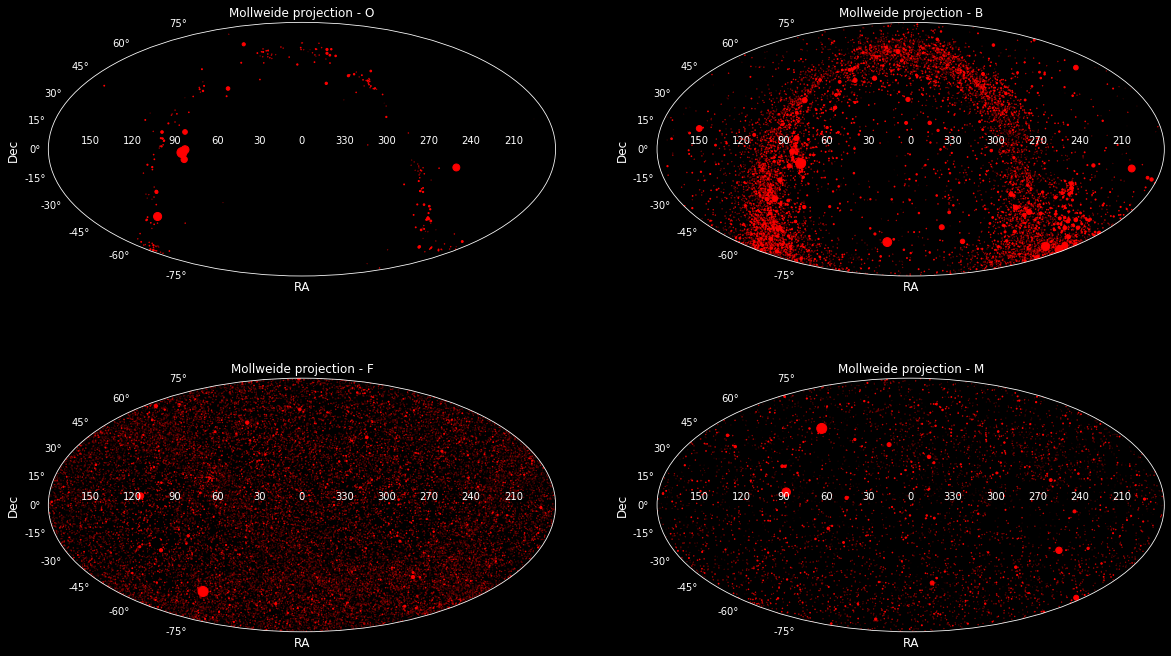

In [145]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,12),  subplot_kw={'projection': 'mollweide'})

plot_mwd(fig, ax1, df_spect, whole_data=False, spect='O', size='flux_prop')
plot_mwd(fig, ax2, df_spect, whole_data=False, spect='B', size='flux_prop')
plot_mwd(fig, ax3, df_spect, whole_data=False, spect='F', size='flux_prop')
plot_mwd(fig, ax4, df_spect, whole_data=False, spect='M', size='flux_prop')

-----------

## GRB Data - Scraping and dataframe

In [11]:
import requests 
page = requests.get("http://astrosat.iucaa.in/czti/?q=grb")

In [12]:
from bs4 import BeautifulSoup, Comment
soup = BeautifulSoup(page.content,'html.parser')

In [28]:
contentTable  = soup.find('table',)
rows  = contentTable.find_all('tr')

data={0: list(), 1:list(), 2:list(), 3:list()}

for row in rows:
    tags = row.find_all(['a','style'])
    for tag in tags:
        tag.decompose()

    rowData = row.find_all('td')
    
    i=0
    for x in rowData:
        if i>3:
            break
#         print(x)
        try:
            temp = x.find('p').text.replace('\n', ' ').replace('\t', ' ').strip()
            if temp in ['--', '--, --']:
                data[i].append(None)
            else:
                data[i].append(temp)
            i+=1
        except:
            temp = x.get_text().replace('\n', ' ').replace('\t', ' ').strip()
            if temp in ['--', '--, --']:
                data[i].append(None)
            else:
                data[i].append(temp)
            i+=1

# headers = ['GRB_No', 'GRB_Name', 'Trigger_Time', 'RA,Dec']

In [1]:
df_grb = pd.DataFrame.from_dict(data,orient='index').transpose()
print(df_grb.head(2))
df_grb.columns = df_grb.iloc[0].values
df_grb = df_grb.drop(0).reset_index(drop=True)
print(df_grb.shape)
df_grb.head()

NameError: name 'pd' is not defined

In [190]:
df_grb.isna().sum()

GRB No           0
GRB Name         0
Trigger time     0
RA, Dec         84
dtype: int64

In [191]:
df_grb.dropna(subset=['RA, Dec'], inplace=True)
df_grb.reset_index(drop=True, inplace=True)
df_grb.shape

(214, 4)

In [192]:
df_grb['ra'] = df_grb['RA, Dec'].apply(lambda x : x.split(',')[0] if len(x.split(','))==2 else x.split(' ')[0])
df_grb['dec'] = df_grb['RA, Dec'].apply(lambda x : x.split(',')[-1] if len(x.split(','))==2 else x.split(' ')[-1])

In [193]:
df_grb['ra'] = pd.to_numeric(df_grb['ra'].str.strip())
df_grb['dec'] = pd.to_numeric(df_grb['dec'].str.strip())

df_grb.head()

,GRB No,GRB Name,Trigger time,"RA, Dec",ra,dec
0,297,GRB200510A,326803277.0,"155.1, -1.9",155.1,-1.9
1,296,GRB200506C,326454069.0,"190.9, 40.2",190.9,40.2
2,295,GRB200506A,326420922.0,"271.7, -4.4",271.7,-4.4
3,293,GRB200502A,326123194.0,"289.5, 38.6",289.5,38.6
4,292,GRB200424A,325426031.0,"307.5, -39.7",307.5,-39.7


In [194]:
df_temp.head()

,id,ra,dec,spect,dist,lum,var,var_min,var_max,flux_prop
0,1,0.000900,1.089009,F5,219.7802,9.638290,NaN,NaN,NaN,0.000200
1,2,0.004245,-19.498840,K3V,47.9616,0.392283,NaN,NaN,NaN,0.000171
2,3,0.005025,38.859279,B9,442.4779,386.901132,NaN,NaN,NaN,0.001976
3,4,0.008535,-51.893546,F0V,134.2282,9.366989,NaN,NaN,NaN,0.000520
4,5,0.009975,-40.591202,G8III,257.7320,21.998851,NaN,NaN,NaN,0.000331


In [195]:
df_variable = df_temp.dropna(subset=['var'])
print(df_temp.shape)
print(df_temp.drop(df_variable.index).shape)
df_variable.head()

(119613, 10)
(113623, 10)


,id,ra,dec,spect,dist,lum,var,var_min,var_max,flux_prop
7,8,0.027345,25.886461,M6e-M8.5e Tc,200.8032,8.425584,Z,11.748,7.648,0.000209
40,41,0.121965,67.216783,B...,100000.0000,496592.321450,V463,10.824,10.514,0.000050
62,63,0.181785,45.253334,B9p SiEu,187.9699,87.902252,CG,6.382,6.322,0.002488
75,76,0.228210,32.825654,M0,346.0208,25.491771,V401,9.079,8.979,0.000213
98,99,0.316035,60.355282,C5p,877.1930,1023.292992,WZ,7.276,6.836,0.001330


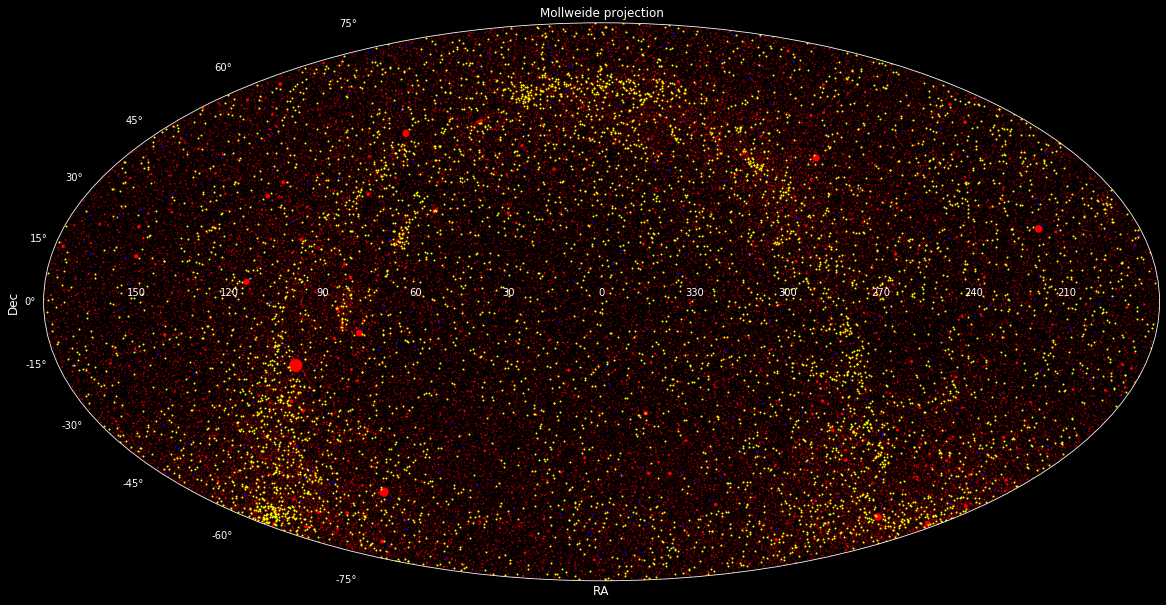

In [187]:
# Complete plot

fig, ax = plt.subplots(1, figsize=(20,12),  subplot_kw={'projection': 'mollweide'})

plot_mwd(fig, ax, df_temp.drop(df_variable.index), size='flux_prop', scale=150 ,color='red')
plot_mwd(fig, ax, df_variable, size=1, color='yellow')
plot_mwd(fig, ax, df_grb, size=1, color='blue', origin=0)